In [1]:
#Import dependencies
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

#genre_df = Spotify Dataset 1921-2020, 160k+ Tracks


genre_df = pd.read_csv("../Datasets/data_by_genres.csv")
#Demostrar el grado de valence en los Top 100 de géneros populares

genres_popularity=genre_df[["genres","popularity","valence"]]
genres_popularity=genres_popularity.sort_values(by="popularity", ascending=False)
genres_energy=genre_df[["genres","energy","danceability","loudness","popularity","valence"]]
genres_energy=genres_energy.sort_values(by="energy", ascending=False)
genres_energy.head(100)

genres_energy = genres_energy[genres_energy['popularity'] > 50]  

generes_energy_fil = genres_energy.reset_index()
generes_energy_fil

,index,genres,energy,danceability,loudness,popularity,valence
0,1361,japanese post-hardcore,0.987500,0.26600,-0.13150,61.50,0.4350
1,1428,kawaii metal,0.985000,0.61600,-1.59800,53.00,0.4870
2,44,alt-idol,0.985000,0.61600,-1.59800,53.00,0.4870
3,1354,japanese indie rock,0.981000,0.52600,-1.82000,70.00,0.7810
4,1807,norwegian punk rock,0.980000,0.27500,-0.86600,55.00,0.4550
...,...,...,...,...,...,...,...
717,1280,irish indie,0.088900,0.52100,-19.45700,64.00,0.0479
718,1506,lldm,0.085700,0.58400,-23.72500,52.00,0.4750
719,2051,quatuor a cordes,0.043900,0.28600,-24.74500,51.00,0.0932
720,2656,zen,0.027600,0.15500,-24.86600,66.00,0.1220


In [376]:

genre_val = []
genre_dan = []
genre_lou = []
genre_ene = []
genre_pop = []
local_gen = []

genre = []
valence = 0
popularity = 0
loudness = 0
danceability = 0
energy = 0
valences = []
popularities = []
loudnesses = []
danceabilities = []
energies = []
countries =["mexican", "australian", "argentine", "colombian", "chile", "japan", "chinese", "spanish", "canadian",
            "american", "french", "german", "russia", "indonesian", "indian", "south african", "nigerian",
           "belgian", "brazil", "british", "czech", "danish", "dutch", "greek", "icelandic", "israeli"]
for country in countries:
    for i in range(len(generes_energy_fil["genres"])):
        if country in generes_energy_fil["genres"][i]:
            genre.append(generes_energy_fil["genres"][i])
            genre_val.append(generes_energy_fil["valence"][i])
            genre_pop.append(generes_energy_fil["popularity"][i])
            genre_lou.append(generes_energy_fil["loudness"][i])
            genre_dan.append(generes_energy_fil["danceability"][i])
            genre_ene.append(generes_energy_fil["energy"][i])
            valence += generes_energy_fil["valence"][i]
            popularity += generes_energy_fil["popularity"][i]
            loudness += generes_energy_fil["loudness"][i]
            danceability += generes_energy_fil["danceability"][i]
            energy += generes_energy_fil["energy"][i]
    popularities.append(popularity/len(genre))
    valences.append(valence/len(genre))
    loudnesses.append(loudness/len(genre))
    danceabilities.append(danceability/len(genre))
    energies.append(energy/len(genre))


countries_filtered_df = pd.DataFrame({"country": countries, "valence": valences, "popularity": popularities, "loudness": loudnesses,
                            "danceability": danceabilities, "energy": energies})

countries_sort = countries_filtered_df.sort_values(by=['valence'], ascending=False)

countries_sort.head()

,country,valence,popularity,loudness,danceability,energy
0,mexican,0.603176,55.859433,-7.460313,0.614641,0.647162
4,chile,0.541095,57.126351,-7.291447,0.619472,0.647873
5,japan,0.536833,57.755723,-6.716750,0.591520,0.680549
7,spanish,0.519879,58.011451,-7.402133,0.586251,0.661253
3,colombian,0.519710,56.306306,-7.470044,0.597814,0.643766


In [235]:
local_df = pd.DataFrame({"genre": genre, "valence": genre_val, "danceability": genre_dan,
                        "popularity": genre_pop, "energy": genre_ene, "loudness": genre_lou})

local_df["loudness"] = local_df["loudness"].abs()

local_df.describe()

#Local production Valence 75% is 0.59, so we'll use 60 as threshold to consider popular genres

,valence,danceability,popularity,energy,loudness
count,131.000000,131.000000,131.000000,131.000000,131.000000
mean,0.484919,0.607420,57.775476,0.633345,7.940346
std,0.173514,0.130450,6.342896,0.177691,3.795610
min,0.076400,0.244000,50.164890,0.089970,0.131500
25%,0.368498,0.538025,52.851716,0.547820,5.832126
50%,0.496331,0.616220,56.000000,0.655367,7.317429
75%,0.594756,0.694176,60.464352,0.741394,8.945465
max,0.888000,0.906000,79.000000,0.987500,28.593000


In [324]:
mex_genres = local_df.query('genre.str.contains("mexican")')[local_df['popularity'] > 50]
arg_genres = local_df.query('genre.str.contains("argentine")')[local_df['popularity'] > 50]
aus_genres = local_df.query('genre.str.contains("australian")')[local_df['popularity'] > 50]
jpn_genres = local_df.query('genre.str.contains("japan")')[local_df['popularity'] > 50]
can_genres = local_df.query('genre.str.contains("canadian")')[local_df['popularity'] > 50]
ger_genres = local_df.query('genre.str.contains("german")')[local_df['popularity'] > 50]
gbp_genres = local_df.query('genre.str.contains("british")')[local_df['popularity'] > 50]


<ipython-input-324-30c6d7e4acbe>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mex_genres = local_df.query('genre.str.contains("mexican")')[local_df['popularity'] > 50]
<ipython-input-324-30c6d7e4acbe>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  arg_genres = local_df.query('genre.str.contains("argentine")')[local_df['popularity'] > 50]
<ipython-input-324-30c6d7e4acbe>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  aus_genres = local_df.query('genre.str.contains("australian")')[local_df['popularity'] > 50]
<ipython-input-324-30c6d7e4acbe>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  jpn_genres = local_df.query('genre.str.contains("japan")')[local_df['popularity'] > 50]
<ipython-input-324-30c6d7e4acbe>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  can_genres = local_df.query('genre.str.contains("canadian")')[local

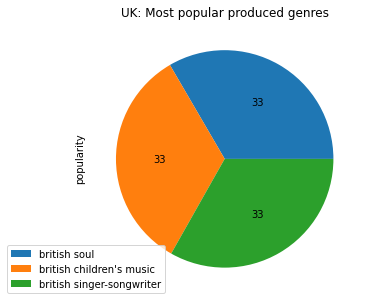

In [378]:
gbp_pie = gbp_genres["popularity"].plot.pie(y="genres", figsize=(5, 5), autopct='%.0f', labels=None)
plt.legend(gbp_genres["genre"],bbox_to_anchor=(0.30, 0.20))
plt.title("UK: Most popular produced genres")
plt.savefig("../Plots/uk-popular-produced")

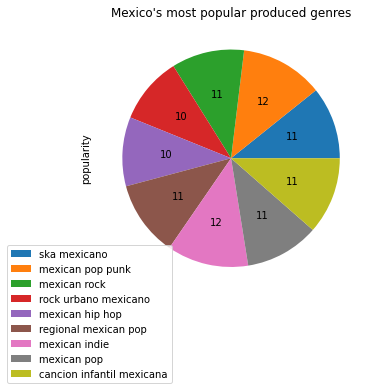

In [353]:
mex_pie = mex_genres["popularity"].plot.pie(y="genres", figsize=(5, 5), autopct='%.0f', labels=None)
plt.legend(mex_genres["genre"],bbox_to_anchor=(0.30, 0.20))
plt.title("Mexico's most popular produced genres")
plt.savefig("../Plots/mex-popular-produced")

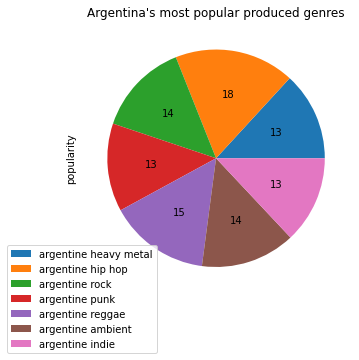

In [354]:
arg_pie = arg_genres["popularity"].plot.pie(y="genres", figsize=(5, 5), autopct='%.0f', labels=None)
plt.legend(arg_genres["genre"],bbox_to_anchor=(0.30, 0.20))
plt.title("Argentina's most popular produced genres")
plt.savefig("../Plots/arg-popular-produced")

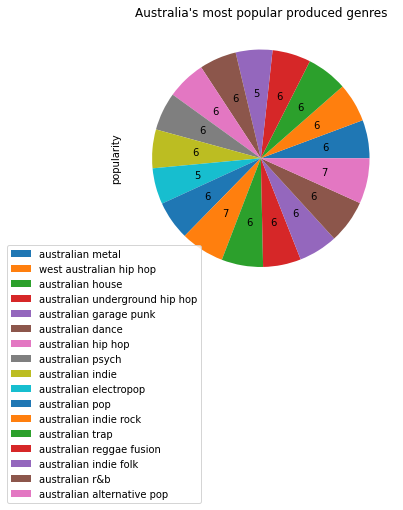

In [355]:
aus_pie = aus_genres["popularity"].plot.pie(y="genres", figsize=(5, 5), autopct='%.0f', labels=None)
plt.legend(aus_genres["genre"],bbox_to_anchor=(0.30, 0.20))
plt.title("Australia's most popular produced genres")
plt.savefig("../Plots/aus-popular-produced")

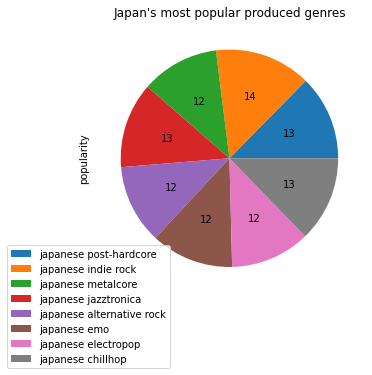

In [356]:
jpn_pie = jpn_genres["popularity"].plot.pie(y="genres", figsize=(5, 5), autopct='%.0f', labels=None)
plt.legend(jpn_genres["genre"],bbox_to_anchor=(0.30, 0.20))
plt.title("Japan's most popular produced genres")
plt.savefig("../Plots/jpn-popular-produced")

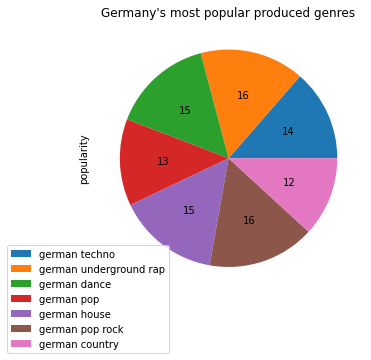

In [357]:
ger_pie = ger_genres["popularity"].plot.pie(y="genres", figsize=(5, 5),autopct='%.0f', labels=None)
plt.legend(ger_genres["genre"],bbox_to_anchor=(0.30, 0.20))
plt.title("Germany's most popular produced genres")
plt.savefig("../Plots/ger-popular-produced")

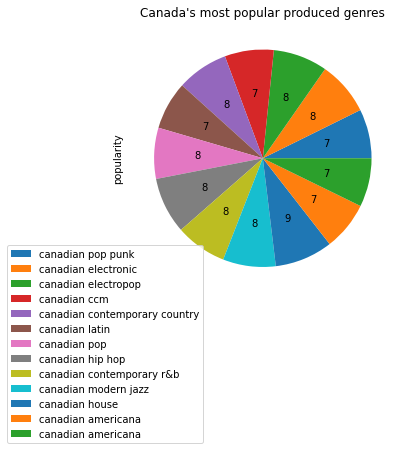

In [358]:
can_pie = can_genres["popularity"].plot.pie(y="genres", figsize=(5, 5),autopct='%.0f', labels=None)
plt.legend(can_genres["genre"],bbox_to_anchor=(0.30, 0.20))
plt.title("Canada's most popular produced genres")
plt.savefig("../Plots/can-popular-produced")

In [3]:
#Integrate most popular music per country features (Danceability, Energy, Loudnes and Valence) based on Billboard's
#International charts from 2019-20, focused on the countries listed next.

#Set variables to scan through the csv files
countries = ["ARG","MEX","AUS", "CAN", "ESP", "FRA", "GBP", "GER", "ITA","SUI","EUR", "JPN", "KOR"]
col_list = ["danceability", "energy", "valence", "loudness"]
files_name=[]
by_nationality=[]

#Define a function to crawl the csv's and define variables for each country containing Danceability, Energy and Valence
#criteria and store them in by_nationality.

for x in countries:
    file=f'../Datasets/Billboard International Charts (2019-Aug 2020)/{x}.csv'
    if x=="ARG":        
        ar_con = ARG=by_nationality.append((pd.DataFrame(pd.read_csv(file,usecols=col_list)
                                   [col_list])).mean())
    elif x=="AUS":      
        au_con = AUS=by_nationality.append((pd.DataFrame(pd.read_csv(file,usecols=col_list)
                                   [col_list])).mean())
    elif x=="CAN":
        ca_con = CAN=by_nationality.append((pd.DataFrame(pd.read_csv(file,usecols=col_list)
                                   [col_list])).mean())
    elif x=="ESP":
        es_con = ESP=by_nationality.append((pd.DataFrame(pd.read_csv(file,usecols=col_list)
                                   [col_list])).mean())
    elif x=="EUR":
        eu_con = EUR=by_nationality.append((pd.DataFrame(pd.read_csv(file,usecols=col_list)
                                   [col_list])).mean())
    elif x=="FRA":
        fr_con = FRA=by_nationality.append((pd.DataFrame(pd.read_csv(file,usecols=col_list)
                                   [col_list])).mean())
    elif x=="GBP":
        gb_con = GBP=by_nationality.append((pd.DataFrame(pd.read_csv(file,usecols=col_list)
                                   [col_list])).mean())
    elif x=="GER":
        gr_con = GER=by_nationality.append((pd.DataFrame(pd.read_csv(file,usecols=col_list)
                                   [col_list])).mean())
    elif x=="ITA":
        it_con = ITA=by_nationality.append((pd.DataFrame(pd.read_csv(file,usecols=col_list)
                                   [col_list])).mean())
    elif x=="JPN":
        jp_con = JPN=by_nationality.append((pd.DataFrame(pd.read_csv(file,usecols=col_list)
                                   [col_list])).mean())
    elif x=="KOR":
        ko_con = KOR=by_nationality.append((pd.DataFrame(pd.read_csv(file,usecols=col_list)
                                   [col_list])).mean())
    elif x=="MEX":
        mx_con = MEX=by_nationality.append((pd.DataFrame(pd.read_csv(file,usecols=col_list)
                                   [col_list])).mean())
    elif x=="SUI":
        su_con = SUI=by_nationality.append((pd.DataFrame(pd.read_csv(file,usecols=col_list)
                                   [col_list])).mean())


In [4]:
#Create a df with the list items storer under by nationality
by_nat = pd.DataFrame(by_nationality, index=countries)

#Reset index to match with the Production df columns
by_nat = by_nat.rename(index={'ARG': 'ARG_cons','MEX': 'MEX_cons',
                             'AUS' : 'AUS_cons', 'CAN' : 'CAN_cons',
                             'GBP' : 'GBP_cons', 'GER' : 'GER_cons',
                             'JPN' : 'JPN_cons'})
#Turn negative Db to positive values
by_nat = by_nat.abs()

In [18]:
#Homologate production (countries_df) shape to match consumption (by_nat)
new_countries_df = countries_filtered_df.set_index('country')

#Select the columns for studied countries
new_countries_df = new_countries_df.loc[['argentine', 'mexican', 'australian',
                                         'canadian', 'british', 'german','japan']]

#Reset index to match consumption df
new_countries_df = new_countries_df.rename(index={'argentine': 'ARG_prod','mexican': 'MEX_prod',
                                                 'australian' : 'AUS_prod', 'canadian' : 'CAN_prod',
                                                 'british' : 'GBP_prod', 'german' : 'GER_prod',
                                                 'japan' : 'JPN_prod'})

#Lowercase column labels to homologate with consumption df
new_countries_df.columns = new_countries_df.columns.str.lower()

#Turn negative Db to positive values
new_countries_df = new_countries_df.abs()

In [6]:
#Merge both df to plot comparissons. Drop criteria that can't be compared (popularity, loudness)
vertical_stack = pd.concat([by_nat, new_countries_df], axis=0).drop(['popularity'], axis=1)

#Clean dataframe by dropping rows that were only present in one df and transpose it to get an easy plotting shape
vertical_stack = vertical_stack.drop(['ESP','FRA','ITA','SUI','KOR','EUR']).T

vertical_stack 


,ARG_cons,MEX_cons,AUS_cons,CAN_cons,GBP_cons,GER_cons,JPN_cons,ARG_prod,MEX_prod,AUS_prod,CAN_prod,GBP_prod,GER_prod,JPN_prod
danceability,0.768989,0.741207,0.716034,0.768575,0.718678,0.722793,0.561953,0.590111,0.614641,0.582357,0.590853,0.605942,0.599660,0.591520
energy,0.771080,0.699149,0.593791,0.570161,0.625690,0.653103,0.713662,0.640539,0.647162,0.666875,0.653488,0.640430,0.642714,0.680549
valence,0.668241,0.710977,0.521402,0.576659,0.568583,0.521989,0.496940,0.504964,0.603176,0.501752,0.504243,0.498338,0.504896,0.536833
loudness,3.399483,5.121724,6.323402,6.623161,6.225448,6.312805,6.586612,7.511832,7.460313,6.842534,7.444228,7.775069,7.660068,6.716750


In [7]:
#Extract each countries comparison by storing it in specified variables. This will make it easier to plot.
stack_ARG = vertical_stack[["ARG_cons", "ARG_prod"]]
stack_MEX = vertical_stack[["MEX_cons", "MEX_prod"]]
stack_AUS = vertical_stack[["AUS_cons", "AUS_prod"]]
stack_CAN = vertical_stack[["CAN_cons", "CAN_prod"]]
stack_GBP = vertical_stack[["GBP_cons", "GBP_prod"]]
stack_GER = vertical_stack[["GER_cons", "GER_prod"]]
stack_JPN = vertical_stack[["JPN_cons", "JPN_prod"]]

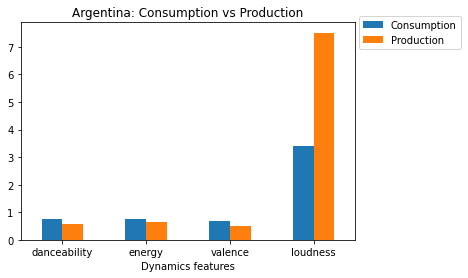

In [361]:
#Plot Argentina comparisson
ARG_bal = stack_ARG.plot.bar(rot=0)
plt.xticks(rotation = "horizontal")
plt.title("Argentina: Consumption vs Production")
plt.xlabel("Dynamics features")
plt.legend(["Consumption", "Production"],bbox_to_anchor=(1.33, 1.05))
plt.savefig("../Plots/ARG-cons-vs-prod")

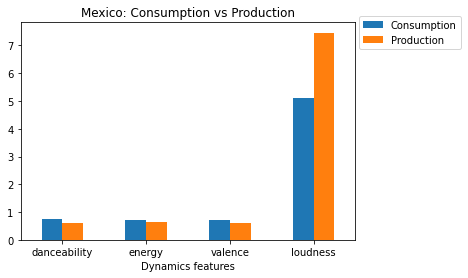

In [363]:
#Plot Mexico comparisson
MEX_bal = stack_MEX.plot.bar(rot=0)
plt.xticks(rotation = "horizontal")
plt.title("Mexico: Consumption vs Production")
plt.xlabel("Dynamics features")
plt.legend(["Consumption", "Production"],bbox_to_anchor=(1.33, 1.05))
plt.savefig("../Plots/MEX-cons-vs-prod")

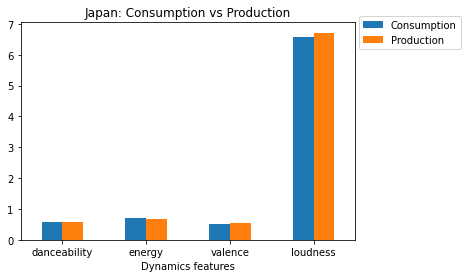

In [364]:
##Plot Japan comparisson
JPN_bal = stack_JPN.plot.bar(rot=0)
plt.xticks(rotation = "horizontal")
plt.title("Japan: Consumption vs Production")
plt.xlabel("Dynamics features")
plt.legend(["Consumption", "Production"],bbox_to_anchor=(1.33, 1.05))
plt.savefig("../Plots/JPN-cons-vs-prod")

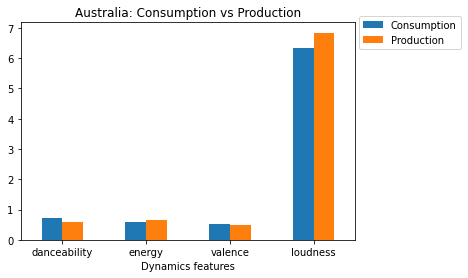

In [365]:
#Plot Australia comparisson
AUS_bal = stack_AUS.plot.bar(rot=0)
plt.xticks(rotation = "horizontal")
plt.title("Australia: Consumption vs Production")
plt.xlabel("Dynamics features")
plt.legend(["Consumption", "Production"],bbox_to_anchor=(1.33, 1.05))
plt.savefig("../Plots/AUS-cons-vs-prod")

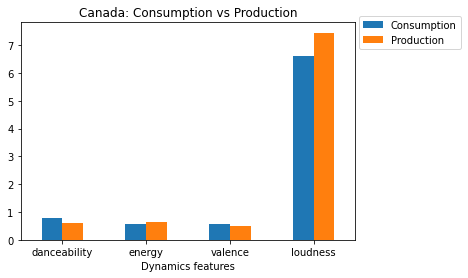

In [366]:
#Plot Canada comparisson
CAN_bal = stack_CAN.plot.bar(rot=0)
plt.xticks(rotation = "horizontal")
plt.title("Canada: Consumption vs Production")
plt.xlabel("Dynamics features")
plt.legend(["Consumption", "Production"],bbox_to_anchor=(1.33, 1.05))
plt.savefig("../Plots/CAN-cons-vs-prod")

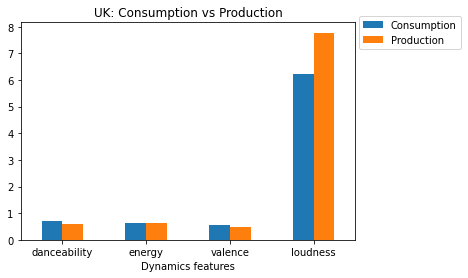

In [367]:
#Plot UK comparisson
GBP_bal = stack_GBP.plot.bar(rot=0)
plt.xticks(rotation = "horizontal")
plt.title("UK: Consumption vs Production")
plt.xlabel("Dynamics features")
plt.legend(["Consumption", "Production"],bbox_to_anchor=(1.33, 1.05))
plt.savefig("../Plots/UK-cons-vs-prod")

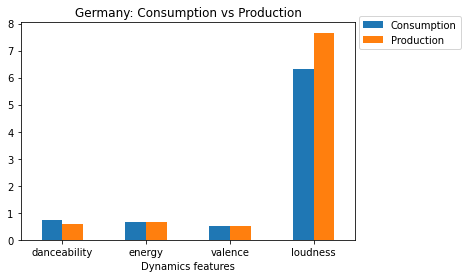

In [368]:
#Plot Germany comparisson
GER_bal = stack_GER.plot.bar(rot=0)
plt.xticks(rotation = "horizontal")
plt.title("Germany: Consumption vs Production")
plt.xlabel("Dynamics features")
plt.legend(["Consumption", "Production"],bbox_to_anchor=(1.33, 1.05))
plt.savefig("../Plots/GER-cons-vs-prod")

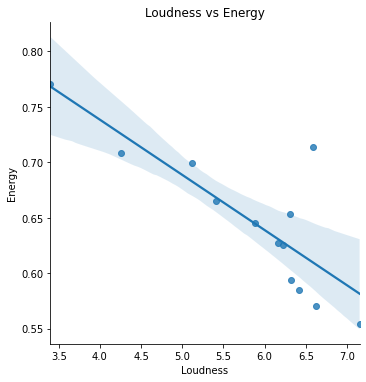

In [15]:
import seaborn as sns

inv_stack = vertical_stack.T

sns.lmplot(x='loudness',y='energy',data=by_nat,fit_reg=True) 

plt.title("Loudness vs Energy")
plt.xlabel("Loudness")
plt.ylabel("Energy")
plt.savefig("../Plots/Cons-loudness-vs-energy")

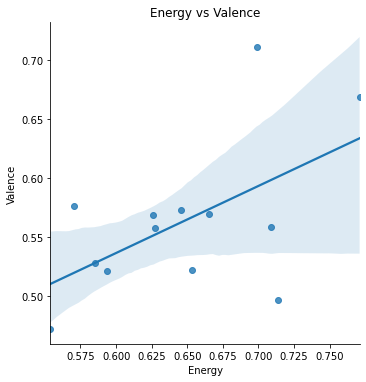

In [16]:
sns.lmplot(x='energy',y='valence',data=by_nat,fit_reg=True) 

plt.title("Energy vs Valence")
plt.xlabel("Energy")
plt.ylabel("Valence")
plt.savefig("../Plots/Cons-energy-vs-valence")